In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn import tree, svm, datasets, metrics, preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from utilities import plot_2d_data, plot_2d_classifier, plot_confusionmatrix
from utilities import learning_curve_model, validation_curve_model, plot_learning_curve
from scipy import stats
import seaborn as sns
import os
import timeit

from utilities import get_colors
cm = get_colors(colormap='RdBu', n_colors=2)

In [3]:
data = pd.read_csv("./data/bank.csv")
data.shape

(11162, 17)

In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data = data.apply(LabelEncoder().fit_transform)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [6]:
data_X = data.drop(columns = ['deposit'], axis=1)/256
data_y = data['deposit']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=100)

In [7]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [ ]:
dtc = tree.DecisionTreeClassifier(random_state=100)
dtc.fit(train_X, train_y)

In [ ]:
train_size=np.linspace(.1, 1.0, 15)
learning_curve_model(data_X, data_y, dtc, cv, train_size)
plt.show()

In [ ]:
predict_y_train = dtc.predict(train_X)
predict_y = dtc.predict(test_X)
print(f"Training accuracy score: {100* accuracy_score(train_y, predict_y_train)}%")
print(f"Testing accuracy Score: {100* accuracy_score(test_y, predict_y)}%")

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
plot_learning_curve(dtc, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)
plot_learning_curve(dtc_pre, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
plot_learning_curve(dtc_post, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

### Neural Network

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (5 layer MLP)"
clf1 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,), solver='sgd', max_iter=10000, random_state=18)
clf1.fit(train_X, train_y)
plt.subplot(clf1.loss_curve_)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (10 layer MLP)"
clf2 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10,), solver='sgd', max_iter=10000, random_state=18)
clf2.fit(train_X, train_y)
plt.subplot(clf2.loss_curve_)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

title = "Learning Curves (15 layer MLP)"
clf3 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(15,), solver='sgd', max_iter=10000, random_state=18)
clf3.fit(train_X, train_y)
plt.subplot(clf3.loss_curve_)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

In [ ]:
sc = StandardScaler() 
scaled_train_X = sc.fit_transform(train_X)
scaled_test_X = sc.transform(test_X)

In [ ]:
mlp = MLPClassifier(max_iter=5000, random_state=18, early_stopping=True)
param_list = {"hidden_layer_sizes": [(1,),(5,),(10,)], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00001, 0.00005,0.0005]}

gcv = GridSearchCV(estimator=mlp, param_grid=param_list)
gcv.fit(scaled_train_X, train_y)

In [ ]:
print('Best parameters found:\n', gcv.best_params_, gcv.best_score_)

In [ ]:
# title = "Learning Curves (5 layer MLP)"
#clf1 = MLPClassifier(hidden_layer_sizes=(11,8), solver='lbfgs', max_iter=10000, random_state=18, early_stopping=True)
#clf1.fit(scaled_train_X, train_y)
#print (clf1.score(scaled_train_X,train_y))
#print(f"Testing accuracy score: {100* accuracy_score(test_y, clf1.predict(scaled_test_X))}%")
# plt.plot(clf1.validation_scores_)

param_range = np.arange(0, 75, 1)
train_scores, test_scores = validation_curve(
    MLPClassifier(alpha=0.00005, hidden_layer_sizes=(5,), solver='lbfgs', max_iter=100, random_state=18, early_stopping=True), scaled_train_X, train_y, param_name="max_iter", param_range=param_range,
    scoring="accuracy", n_jobs=4)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with MLP Classifier")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.ylim(0.55, 0.85)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(16,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train2_X, val_X, train2_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=100)

hist = model.fit(train2_X, train2_y,
          batch_size=32, epochs=150,
          validation_data=(val_X, val_y))


In [ ]:
model.evaluate(test_X, test_y)[1]

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Value', 'Accuracy Train', 'Accuracy Value'], loc='best')
plt.show()

### Boosting

In [10]:
n_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)
 
for i, rate in enumerate(learning_rates):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump, 
                                   n_estimators=10, learning_rate=rate)
        model.fit(train_X.values[trn, :], train_y.values[trn])
        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], model.predict(train_X.values[val, :]))
trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)
print(f'Training Error {trn_err}, Value Error {val_err}')


Training Error [0.29086248 0.25101727 0.22788412 0.22311814 0.21973338 0.22433768
 0.22178667 0.21822792 0.21489289 0.22722476], Value Error [0.2918582  0.25277156 0.22801937 0.22443896 0.2277988  0.22477302
 0.22466242 0.22130308 0.21615166 0.23037175]


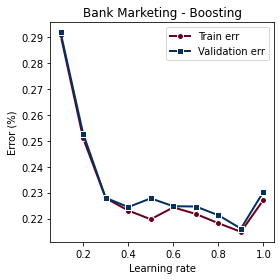

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(learning_rates, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(learning_rates, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_title("Bank Marketing - Boosting")
ax.set_xlabel('Learning rate')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [16]:
n_estimator_steps, n_folds = 2, 10
number_of_stumps = np.arange(2,125, n_estimator_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)

trn_acc = np.zeros((len(number_of_stumps), n_folds))
val_acc = np.zeros((len(number_of_stumps), n_folds))
test_acc = np.zeros((len(number_of_stumps), n_folds))

stump = DecisionTreeClassifier(max_depth=1)
for i, n_stumps in enumerate(number_of_stumps):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump,
                                   n_estimators=n_stumps, learning_rate=0.9)
        model.fit(train_X.values[trn, :], train_y.values[trn])

        trn_acc[i, j] = accuracy_score(train_y.values[trn], 
                                           model.predict(train_X.values[trn, :]))
        val_acc[i, j] = accuracy_score(train_y.values[val], 
                                           model.predict(train_X.values[val, :]))
        test_acc[i,j] = accuracy_score(test_y, model.predict(test_X))

trn_acc = np.mean(trn_acc, axis=1)
val_acc = np.mean(val_acc, axis=1)
test_acc = np.mean(test_acc, axis=1)

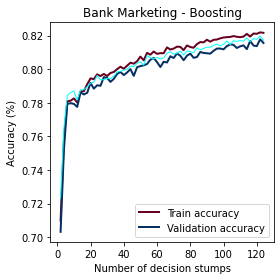

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(number_of_stumps, trn_acc, c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, val_acc, c=cm[1], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, test_acc, c="cyan", markeredgecolor='w', linewidth=1)
ax.legend(['Train accuracy', 'Validation accuracy'])
ax.set_title("Bank Marketing - Boosting")
ax.set_xlabel('Number of decision stumps')
ax.set_ylabel('Accuracy (%)')

fig.tight_layout()

In [13]:
shallow_tree = DecisionTreeClassifier(max_depth=1)
ensemble = AdaBoostClassifier(base_estimator=shallow_tree, 
                                  n_estimators=75, learning_rate=0.9)
ensemble.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.9, n_estimators=75)

In [14]:
ypred = ensemble.predict(test_X)
acc = accuracy_score(test_y, ypred)
acc

0.8248992386923422

In [ ]:
title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
trainAdaBoost(dtc, title)

In [ ]:
title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)
trainAdaBoost(dtc_pre, title)

In [ ]:
title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
trainAdaBoost(dtc_post, title)

plt.show()

### SVM

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(30, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (C5 layer MLP) kernel=rbf"
clf1 = svm.SVC(kernel='rbf', C=15, gamma='auto')
clf1.fit(train_X, train_y)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP) kernel=rbf"
clf2 =  svm.SVC(kernel='rbf', C=30, gamma='auto')
clf2.fit(train_X, train_y)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP) kernel=rbf"
clf3 = svm.SVC(kernel='rbf', C=45, gamma='auto')
clf3.fit(train_X, train_y)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C5 layer MLP) kernel=poly"
clf4 = svm.SVC(kernel='poly', C=15, gamma='auto')
clf4.fit(train_X, train_y)
plot_learning_curve(clf4, title, train_X, train_y, axes=axes[3, :], ylim=(0.2, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP) kernel=poly"
clf5 = svm.SVC(kernel='poly', C=30, gamma='auto')
clf5.fit(train_X, train_y)
plot_learning_curve(clf5, title, train_X, train_y, axes=axes[4,:], ylim=(0.2, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP) kernel=poly"
clf6 = svm.SVC(kernel='poly', C=45, gamma='auto')
clf6.fit(train_X, train_y)
plot_learning_curve(clf6, title, train_X, train_y, axes=axes[5,:], ylim=(0.2, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print(f'Best Score - C5: {clf1.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C30: {clf2.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C45: {clf3.score(test_X, test_y)*100:.2f}%')

In [ ]:
import time

kernelList = ['rbf','poly']
CList = [0.1, 1, 3, 10]
degreeList = [1,2,3]
gammaList = [0.01,0.1,1.0]

for i,kernel in enumerate(kernelList):
    for j,c in enumerate(CList):
        if kernel=='poly':
            for l,degree in enumerate(degreeList):
                clf = svm.SVC(kernel=kernel, C=c, degree=degree, cache_size=400)
                
                start=time.process_time()
                clf.fit(train_X, train_y)
                fitTime = time.process_time() - start
                
                testValue = clf.score(train_X, train_y)*100
                trainValue = clf.score(test_X, test_y)*100 
                
                start = time.process_time()
                clf.predict(test_X)
                testTime = time.process_time() - start
                print(f'SVM: {kernel}, {degree}, {c}, {fitTime:.2f}s, {trainValue:.2f}%, {testTime:.2f}s, {testValue:.2f}%')   
        if kernel=='rbf':
            for l,gamma in enumerate(gammaList):
                clf  = svm.SVC(kernel=kernel, C=c, gamma=gamma, cache_size=400)                                
                
                start=time.process_time()
                clf.fit(train_X, train_y)
                fitTime = time.process_time() - start
                
                testValue = clf.score(train_X, train_y)*100
                trainValue = clf.score(test_X, test_y)*100 
                
                start = time.process_time()
                clf.predict(test_X)
                testTime = time.process_time() - start

                print(f'SVM: {kernel}, {gamma}, {c}, {fitTime:.2f}s, {trainValue:.2f}%, {testTime:.2f}s, {testValue:.2f}%')

### KNN

In [ ]:
# try to find best k value
scoreList = []
trainList = []

for i in range(2,40,2):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_X, train_y)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, knn2.predict_proba(test_X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,knn2.predict(test_X))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (f'# Nodes: {i}', auc))
    pred_y = knn2.predict(train_X)
    trainList.append(accuracy_score(train_y, pred_y))
    scoreList.append(knn2.score(test_X, test_y))
    # Custom settings for the plot 

In [ ]:
plt.plot(range(2,40,2), scoreList, label='Testing Accuracy')
plt.plot(range(2,40,2), trainList, label='Training Accuracy')
plt.legend()
plt.title('KNN - Bank Marketing')
plt.xticks(np.arange(2,40,2))
plt.xlabel("K-value")
plt.ylabel("Score")
plt.show()


In [ ]:
acc = max(scoreList)*100
key = scoreList.index(max(scoreList)) *2
print(f'Maximum KNN Score is {acc:.2f}% at {key} neighbors')